In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from functools import reduce
import scipy
from scipy import sparse
from scipy.special import gamma
import scipy.sparse.linalg
from fractions import Fraction

3.1364


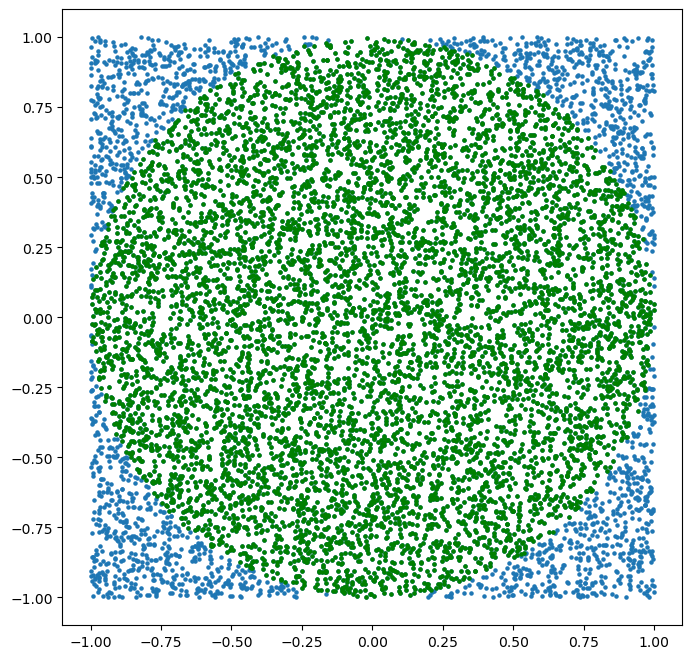

In [13]:
import time
n =10000
np.random.seed(int(time.time()))
a = np.random.random([n,2])*2-1
#plt.imshow(a)
#plt.colorbar()
r = a[:,0]**2 + a[:,1]**2
b = a[r<1]
estimate = 4*len(b)/len(a)
print(estimate)

plt.figure(figsize=(8,8))
plt.scatter(a[:,0],a[:,1], s = 5 )
plt.scatter(b[:,0], b[:,1], s=5,c='green' )
plt.show()


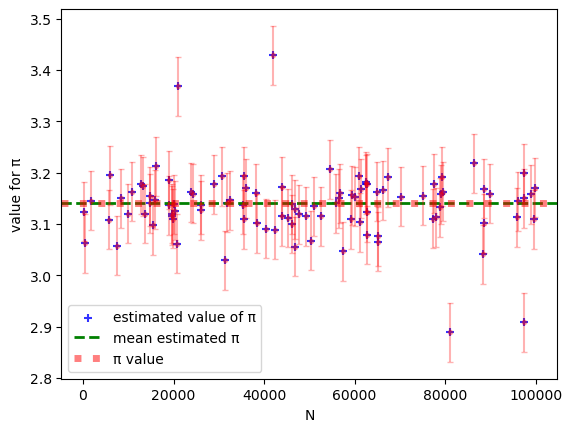

estimated value of π = 3.141602 true value of = π 3.141593
mean error in estimation of π= -0.000010 ± 0.057410


In [44]:
import time
np.random.seed(int(time.time()))
def est_pi(N):
    a = np.random.random([N,2])*2-1
    r = a[:,0]**2 + a[:,1]**2
    b = a[r<1]
    estimate = 4*len(b)/len(a)
    return estimate
N = np.random.randint(10, 5000, size=100000, dtype = int).tolist()
estimated_pi=[]
error_pi = []
for i in N:
    est = est_pi(i)
    estimated_pi.append(est)
    error_pi.append(np.pi-est)

sample_size = int(0.001 * len(N))
indices = np.random.choice(len(N), sample_size, replace=False)
plt.figure()
plt.scatter([indices], [estimated_pi[i] for i in indices], marker='+',c= 'blue',  label= 'estimated value of π', alpha = 0.8)

plt.axhline(np.mean(estimated_pi), color= 'green', linestyle = '--', linewidth= 2, alpha =1, label ='mean estimated π' )
plt.axhline(np.pi, color = 'red', linestyle =':', linewidth = 5, label = 'π value', alpha = 0.5)
plt.xlabel('N')
plt.legend()
plt.ylabel('value for π')
plt.errorbar(indices, [estimated_pi[i] for i in indices], yerr=np.std(error_pi), fmt = '.', capsize=2, color='red', alpha=0.3, label='π estimate ± std dev')

plt.show()
print('estimated value of π =', format(np.mean(estimated_pi), '4f'), 'true value of = π', format(np.pi, '4f'))
print ('mean error in estimation of π=',format(np.mean(error_pi), '4f'), '±' ,format(np.std(error_pi), '4f'))


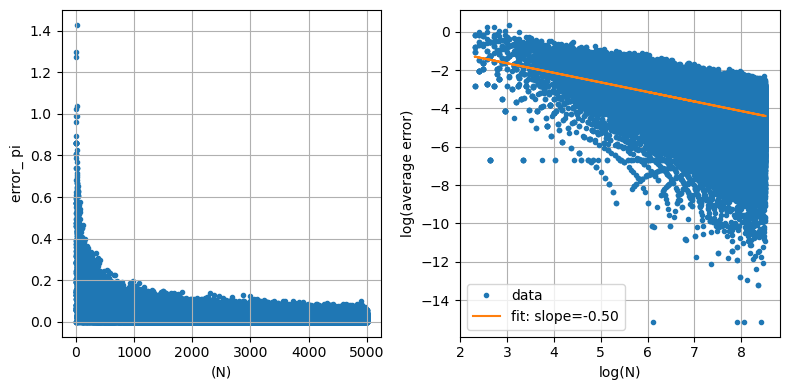

Slope (scaling exponent α): -0.4984


In [45]:

N = np.array(N)
error_pi = np.array(np.abs(error_pi))

mask = (N > 0) & (error_pi > 0)
coeffs = np.polyfit(np.log(N[mask]), np.log(error_pi[mask]), deg=1)
slope = coeffs[0]
intercept = coeffs[1]


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(N, error_pi, marker= '.')
plt.xlabel('(N)')
plt.ylabel('error_ pi' )
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.log(N[mask]), np.log(error_pi[mask]), '.', label='data')
plt.plot(np.log(N[mask]), slope*np.log(N[mask]) + intercept, '-', label=f'fit: slope={slope:.2f}')
plt.xlabel('log(N)')
plt.ylabel('log(average error)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Slope (scaling exponent α): {slope:.4f}")

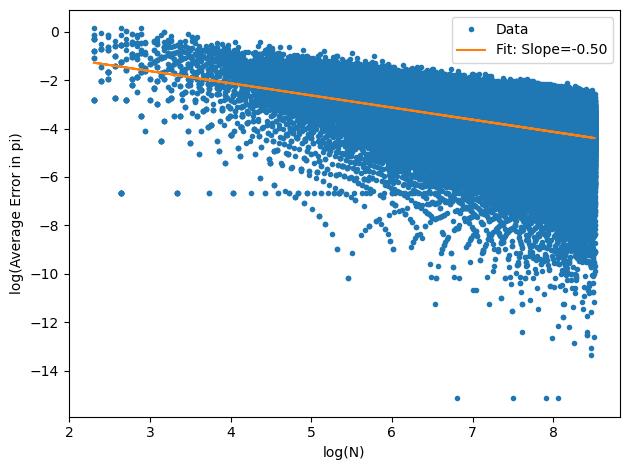

In [33]:
import matplotlib.pyplot as plt
import numpy as np

slope, intercept = np.polyfit(np.log(N[mask]), np.log(error_pi[mask]), 1)

plt.plot(np.log(N[mask]), np.log(error_pi[mask]), '.', label='Data')
plt.plot(np.log(N[mask]), slope * np.log(N[mask]) + intercept, '-', label=f'Fit: Slope={slope:.2f}')

plt.xlabel('log(N)')
plt.ylabel('log(Average Error in pi)')
plt.legend()


plt.tight_layout()


plt.show()


### volume of **d-dimensional** sphere

In [41]:
def vol_nball(n):
    return (np.pi ** (n / 2)) / gamma(n/2 + 1) 
import time
np.random.seed(int(time.time()))
d =3
def est_pf(N):
    a = np.random.random([N,d])*2-1
    r = np.sum(a**2, axis=1)
    b = a[r<1]
    prefactor = (2**d)*len(b)/(len(a)*np.pi)
    return prefactor
N = np.random.randint(1000, 10000, size=100000, dtype = int).tolist()
prefactor=[]
vol_est = []
vol_err = []
for i in N:
    est = est_pf(i)
    vol = est*np.pi
    vol_est.append(vol)
    prefactor.append(est)
    vol_err.append(np.abs(vol - vol_nball(d))/i)

def vol_nball(n):
    return (np.pi ** (n / 2)) / gamma(n/2 + 1) 

frac = Fraction(np.mean(prefactor)).limit_denominator(100)
vol_sp = np.mean(prefactor)*np.pi

print('estimated volume=', format(np.mean(vol_sp), '4f'), 'error =',np.mean(vol_err))
print ('prefactor for volume',format(frac.numerator), '/' ,format(frac.denominator))


estimated volume= 4.188909 error = 1.5190100187518616e-05
prefactor for volume 4 / 3


# Volume of an __n-ball__

The volume is given by:

$$
V_n(R) = \frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2} + 1\right)} R^n
$$


In [8]:
vol_nball(3)


4.188790204786391

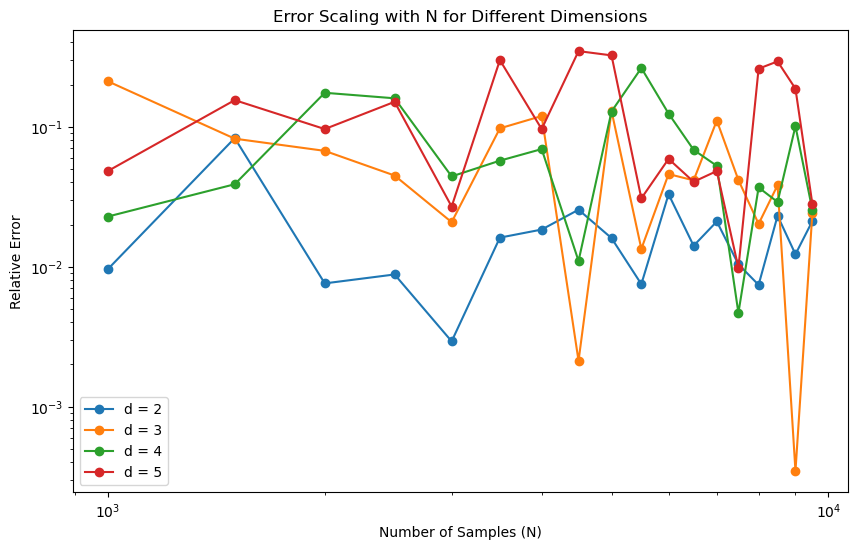

In [39]:
def est_pf(N, d):
    a = np.random.random([N, d]) * 2 - 1
    r = np.sum(a**2, axis=1)
    b = a[r < 1]
    prefactor = (2**d) * len(b) / (len(a) * np.pi)
    return prefactor


d_values = [2, 3, 4, 5]
N_values = np.arange(1000, 10000, 500)
errors = {d: [] for d in d_values}

def vol_nball(n):
    return (np.pi ** (n / 2)) / gamma(n/2 + 1)


for d in d_values:
    for N in N_values:
        prefactor = est_pf(N, d)
        volume_est = prefactor * np.pi
        true_vol = vol_nball(d) 
        error = np.abs(volume_est - true_vol)
        errors[d].append(error)
errors_d =[]
plt.figure(figsize=(10, 6))


for d in d_values:
    plt.plot(N_values, errors[d],'o-', label=f'd = {d}')
    errors_d.append(np.mean(errors[d]))
  
plt.xlabel('Number of Samples (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Error Scaling with N for Different Dimensions')



plt.show()

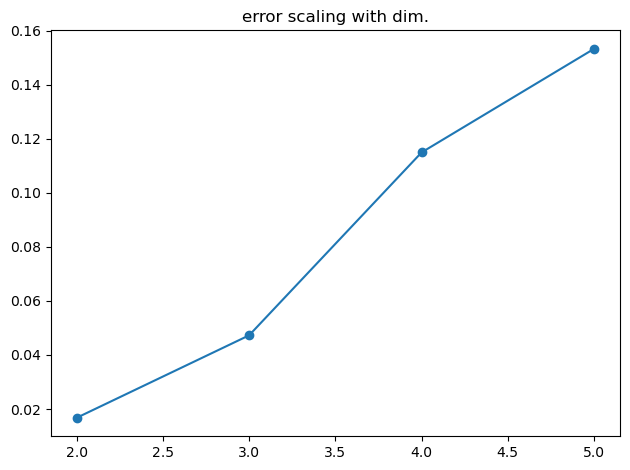

In [29]:

plt.plot(d_values,errors_d, 'o-')
plt.title('error scaling with dim.')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()